# 梳理机器学习的基础内容

## 1```损失函数整理```

* 均方差:
    $$ MSE = \frac{1}{2m}\sum_{i=0}^{m}(y_{i} - y_{t})^2$$

In [15]:
import numpy as np

In [16]:
def MSE(y, t):
    return 0.5* 1 / len(y)* np.sum((y - t)**2)

In [17]:
y = np.array([1,2,3,4,5,6,7])
t = np.array([2,3,4,5,6,7,7])
MSE(y,t)

0.42857142857142855

适用范围: 
> * (1) 线性回归

* 交叉熵 cross_entropy:  
    $$ cross-entropy = - \sum_{k=0}^{n} t_k * \log y_k $$

* 交叉熵刻画的是两个概率分布的距离，也就是说交叉熵值越小（相对熵的值越小），两个概率分布越接近  
* 最小化交叉熵等于最小化KL距离  

补充几个概念方便理解交叉熵：  
>（1）信息量：越不容易发生的事情包含的信息量越大
$$ I(x) = \log {\frac{1}{p(x)}} $$
或
$$ I(x) = - \log {{p(x)}} $$

>（2）期望：某件事情发生的可能性有n种，那么这个事件的实际期望（熵是用来表示所有信息量的期望）：  
$$ H(X) = \sum _{i=1} ^{n}{{p(x_i)}*\log{p(x_i)}}$$ 
而0-1分布问题里，只有两种情况(p(x=0)和p(x=1))，所有结果可以写成  
$$ H(X) = -p(x_{x=0})*log(p(x_{x=0}))-(1-p(x_{x=0}))log(1-p(x_{x=0}))$$

>* (3)相对熵（KL散度）  
> 两个独立的概率分布P(X)和Q(X)，可以用KL散度进行衡量  
$$ D_{KL}(p||q) = \sum _{i=1}^{n}p(x_i)\log{\frac{p(x_i)}{q{(x_i)}}}$$  
>> P(x)一般为机器学习中的标签表示，Q(X)一般是预测的结果  

> * （4）交叉熵
> ? 为什么选择交叉熵？  
> 由KL散度公式展开可得，
$$ D_{KL}(p||q) = \sum_{i=1}^{n}p(x_i)*\log{p(x_i)} - \sum_{i=1}^{n}p(x_i) *\log {q(x_i)}$$ <br/>
$$= -H(p(x)) + [-\sum_{i=1}^{n}p(x_i)\log{q(x_i)}] $$
        

> H(p(x))是P(X)的熵，等式的后一部分就是交叉熵，即  

$$ H(p,q) = -\sum_{i=1}^{n}p(x_i) * \log{q(x_i)}$$

> 机器学习中很明显，H(p(x))是不变的一部分，而H(p,q)是正好描述label和prediction之间差别的距离，因此用作loss函数。

* Python cross_entropy代码：

In [26]:
def cross_entropy(y,t):
    y, t = np.array(y), np.array(t)
    delta = 1e-7
    return -np.sum(y*np.log10(t+delta))

In [27]:
y = [1,2,3,4,5,6,7]
t = [1.1,2.1,3.1,4.1,5.1,6.1,7.1]
cross_entropy(y,t)

-18.819690407950162

实际上这只是单个数据计算出来的cross-entropy，对于多组数据则需要mini-batch.或者说这只是分类问题中的多分类结果

$$ E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}*\log{y_{nk}} $$

* mini-batch

神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。采用mini-batch的原因就是数据体量N可能是巨大的。

In [53]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import pandas as pd

In [58]:
(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


* mini-batch的交叉熵实现

In [11]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    print(y)
    return -np.sum(t * np.log(y +1e-7)) / batch_size

y_ture为非one-hot标签

In [4]:
def cross_entropy_error2(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        print(t)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    print(batch_size)
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [6]:
t = np.array([[0,0,1],[0,1,0],[1,0,0]])

In [7]:
y = np.array([[0.2,0.1,0.7],[0.,0.8,0.2],[0.9,0.0,0.1]])

In [12]:
cross_entropy_error(y, t)

[[0.2 0.1 0.7]
 [0.  0.8 0.2]
 [0.9 0.  0.1]]


0.2283928773141796

In [13]:
import numpy as np

In [15]:
t1 = np.array([2,5,7])
y1 = np.array([1.9,4.9,7.1])
cross_entropy_error(y1, t1)

[[1.9 4.9 7.1]]


-22.950547592154102

## 2 optimizer的分析

```导数```

$$ \frac{df(x)}{dx} = \lim_{1\to\infty}\qquad\frac{f(x+h)-f(x)}{h} $$

前向差分改良成中心差分

$$ \frac{df(x)}{dx} = \lim_{1\to\infty}\qquad\frac{f(x+h)-f(x-h)}{h} $$

In [125]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) -f(x-h)) / (2*h)

In [127]:
x = np.arange(10)
def f(x):
    f = 3*x**3+5*x**2+4*x
    return f


In [132]:
fx = numerical_diff(f,x)

In [133]:
%matplotlib inline

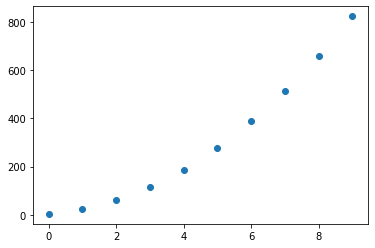

In [134]:
import matplotlib.pyplot as plt
plt.scatter(x, fx)

* 梯度-gradient

In [135]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

梯度法只给机器学习提供了一种较快得降低loss损失函数的方法，但不一定能找到准确的最小值。有可能是鞍点、极小值等。

> 数学表达梯度法:  
  $$ x_0 = x_0 - \eta * \frac{\partial f}{\partial x_0} $$

  $$ x_1 = x_1 - \eta * \frac{\partial f}{\partial x_1} $$

$$\eta$$表示学习率

学习率决定了参数移动到最优值的速度快慢。如果学习率过大，很可能会越过最优值；反而如果学习率过小，优化的效率可能过低，长时间算法无法收敛

> ？？动态调整学习率的方法：  
> > * (1) 学习率每一步都除以集中训练数据量N  （我理解为NAG）
> > * (2) Adagrad算法、RMSprop算法、Momentum算法、Adadelta算法

In [24]:
aa = print('算法 优点 缺点 适用情况'.split( ))
bb = print('BGD 目标函数为凸函数时，可以找到全局最优值 收敛速度慢，需要用到全部数据，内存消耗大 不适用于大数据集，不能在线更新模型'.split( ))
cc = print('''SGD 避免冗余数据的干扰，收敛速度加快，能够在线学习 更新值的方差较大，收敛过程会产生波动，可能落入极小值（卡在鞍点），选择合适的学习率比较困难（需要不断减小学习率） 适用于需要在线更新的模型，适用于大规模训练样本情况Momentum 能够在相关方向加速SGD，抑制振荡，从而加快收敛 需要人工设定学习率 适用于有可靠的初始化参数'''.split( ))

dd = print('''Adagrad 实现学习率的自动更改 仍依赖于人工设置一个全局学习率，学习率设置过大，对梯度的调节太大。中后期，梯度接近于0，使得训练提前结束 需要快速收敛，训练复杂网络时；适合处理稀疏梯度1Adadelta 不需要预设一个默认学习率，训练初中期，加速效果不错，很快，可以避免参数更新时两边单位不统一的问题 在局部最小值附近震荡，可能不收敛 需要快速收敛，训练复杂网络时'''.split( ))

ee = print('''Adam 速度快，对内存需求较小，为不同的参数计算不同的自适应学习率 在局部最小值附近震荡，可能不收敛 需要快速收敛，训练复杂网络时；善于处理稀疏梯度和处理非平稳目标的优点，也适用于大多非凸优化 - 适用于大数据集和高维空间'''.split( ))

['算法', '优点', '缺点', '适用情况']
['BGD', '目标函数为凸函数时，可以找到全局最优值', '收敛速度慢，需要用到全部数据，内存消耗大', '不适用于大数据集，不能在线更新模型']
['SGD', '避免冗余数据的干扰，收敛速度加快，能够在线学习', '更新值的方差较大，收敛过程会产生波动，可能落入极小值（卡在鞍点），选择合适的学习率比较困难（需要不断减小学习率）', '适用于需要在线更新的模型，适用于大规模训练样本情况Momentum', '能够在相关方向加速SGD，抑制振荡，从而加快收敛', '需要人工设定学习率', '适用于有可靠的初始化参数']
['Adagrad', '实现学习率的自动更改', '仍依赖于人工设置一个全局学习率，学习率设置过大，对梯度的调节太大。中后期，梯度接近于0，使得训练提前结束', '需要快速收敛，训练复杂网络时；适合处理稀疏梯度1Adadelta', '不需要预设一个默认学习率，训练初中期，加速效果不错，很快，可以避免参数更新时两边单位不统一的问题', '在局部最小值附近震荡，可能不收敛', '需要快速收敛，训练复杂网络时']
['Adam', '速度快，对内存需求较小，为不同的参数计算不同的自适应学习率', '在局部最小值附近震荡，可能不收敛', '需要快速收敛，训练复杂网络时；善于处理稀疏梯度和处理非平稳目标的优点，也适用于大多非凸优化', '-', '适用于大数据集和高维空间']


> * SGD:
$$ \theta_{i\_{new}} = \theta_{i} - \eta * \nabla_{\theta{i}}J(\theta)$$

$$\nabla_{\theta{i}}J(\theta) = \frac {\partial J(\theta)} {\partial\theta_{i}}$$

In [66]:
# 随机梯度下降SGD
# 以 y=x1+2*x2为例

import numpy as np


# 多元数据
def sgd():
    # 训练集，每个样本有三个分量
    x = np.array([(1, 1), (1, 2), (2, 2), (3, 1), (1, 3), (2, 4), (2, 3), (3,3)])
    y = np.array([3, 5, 6, 5, 7, 10, 8, 9])

    # 初始化
    m, dim = x.shape
    theta = np.zeros(dim)  # 参数
    alpha = 0.01  # 学习率
    threshold = 0.0001  # 停止迭代的错误阈值
    iterations = 5000
    # 迭代次数
    error = 0  # 初始错误为0

    # 迭代开始
    # 8个样本数据重复在使用
    for i in range(iterations):
        j = i % m
        error = 1 / (2 * m) * np.dot((np.dot(x, theta) - y).T,(np.dot(x, theta) - y))
        # 迭代停止
        if abs(error) <= threshold:
            break

        theta -= alpha * (1 / m * x[j] * (np.dot(x[j], theta) - y[j]))

    print('迭代次数：%d' % (i + 1), 'theta：', theta, 'error：%f' % error)


if __name__ == '__main__':
    sgd()

迭代次数：3611 theta： [1.01341928 1.98981766] error：0.000100


> * Momentum:

$$v_0 = 0$$
$$ v_{n} = \beta* v_{n-1} + (1-\beta)dw $$ $$ w = w - \alpha v $$

$$ \frac {dJ_{W}} {dW} = ~= dW $$ 

In [297]:
x = np.array([(1, 1), (1, 2), (2, 2), (3, 1), (1, 3), (2, 4), (2, 3), (3,3)])
W = np.array([5,1])
np.dot(x,W)

array([ 6,  7, 12, 16,  8, 14, 13, 18])

In [86]:
# 动量方法Momentum
# 以 y=x1+2*x2为例

import numpy as np
    
# 多元数据
def Momentum():
    # 训练集，每个样本有三个分量
    x = np.array([(1, 1), (1, 2), (2, 2), (3, 1), (1, 3), (2, 4), (2, 3), (3,3)])
    y = np.array([3, 5, 6, 5, 7, 10, 8, 9])

    # 初始化
    m, dim = x.shape
    v_0 = np.zeros(dim)  # W权证初始化参数
    beta = 0.99
    alpha = 0.01  # 学习率
    threshold = 0.0001  # 停止迭代的错误阈值
    iterations = 5000  # 迭代次数
    error = 0  # 初始错误为0
    v = v_0 + (1-beta) * np.zeros(dim)
    theta = np.zeros(dim) - alpha*v
    # 迭代开始
    for i in range(1, iterations):
        j = i % m
        error = 1 / (2 * m) * np.dot((np.dot(x, theta) - y).T,(np.dot(x, theta) - y))
        # 迭代停止
        if abs(error) <= threshold:
            break

        v = beta*v +(1-beta)*(1 /m * x[j] * (np.dot(x[j], theta) - y[j])) 
        theta -= alpha * v

    print('迭代次数：%d' % (i + 1), 'theta：', theta, 'error：%f' % error)


if __name__ == '__main__':
    Momentum()

迭代次数：3401 theta： [1.01340387 1.98981253] error：0.000100


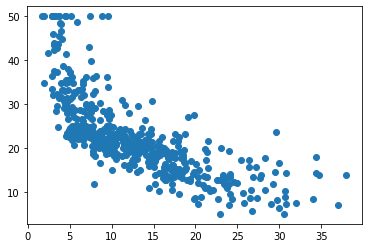

In [164]:
plt.scatter(X[12],y)

In [168]:
x= X[12]

In [226]:
seen = set()
sle = list()
for i, m in zip(x.T,y.T):
    if i in seen: continue
    sle.append((i,m))
    seen.add(i)

In [224]:
y = load_boston()['target']

In [229]:
len(sle)

455

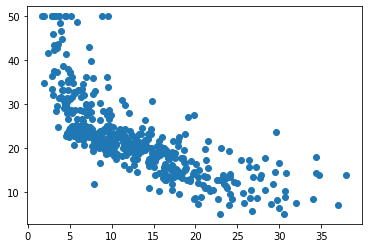

In [232]:
plt.scatter([i for i,_ in sle],[m for _, m in sle])

In [103]:
# 带冲量的随机梯度下降SGD
# 以 y=x1+2*x2为例

import numpy as np

# 多元数据
def sgd():
    # 训练集，每个样本有三个分量
    x = np.array([(1, 1), (1, 2), (2, 2), (3, 1), (1, 3), (2, 4), (2, 3), (3,
                                                                           3)])
    y = np.array([3, 5, 6, 5, 7, 10, 8, 9])

    # 初始化
    m, dim = x.shape
    theta = np.zeros(dim)  # 参数
    alpha = 0.1  # 学习率
    momentum = 0.1  # 冲量
    threshold = 0.0001  # 停止迭代的错误阈值
    iterations = 1500  # 迭代次数
    error = 0  # 初始错误为0
    gradient = 0  # 初始梯度为0

    # 迭代开始
    for i in range(iterations):
        j = i % m
        error = 1 / (2 * m) * np.dot((np.dot(x, theta) - y).T,
                                     (np.dot(x, theta) - y))
        # 迭代停止
        if abs(error) <= threshold:
            break

        gradient = momentum * gradient + alpha * (1 / m * x[j] * (np.dot(x[j], theta) - y[j]))
        theta -= gradient

    print('迭代次数：%d' % (i + 1), 'theta：', theta, 'error：%f' % error)


if __name__ == '__main__':
    sgd()


迭代次数：303 theta： [1.01358856 1.99023727] error：0.000100


加权平均的概念：
$$ v_0 = 0  $$
$$v_{k} = \beta v_{k-1}+(1-\beta)*\theta_{k}, k = 1,2,3...$$

> * Adagrad:

$$ \theta_{i, t+1} = \theta_{i,t} - \frac{\eta} {\sqrt{G_{i,t}+\epsilon}} \nabla_{\theta{i,t}}J(\theta)$$

> ```G_{i,t}```是什么？
> 是前t 次梯度的累积，做简化可以写成：

$$ \theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{G_{t}+\epsilon}}\nabla_{\theta{i}}J(\theta)$$

>>容易看出，随着算法的不断迭代，G_t 会变得越来越大，整体的学习率会越变越小。所以Adagrad可以称前期是激励收敛，后期是惩罚收敛。前期速度快，后期速度慢。

> > 也有人将G_t换乘前t次的平方和进行计算。

$$ \theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{\sum_{r=1}^{t}(g_t)^2+\epsilon}}\nabla_{\theta{i}}J(\theta)$$

>>特点：  
优点： 前期G较大（regulizer较大），放大梯度，产生激励；后期激励小（regulizer较小），产生惩罚。  
缺点： 仍以来人工设置一个全局的学习率\eta，如果设置过大，regularizer过于敏感，对梯度的调节太大（中后期），分母上梯度平方的累积将会越来越大，致使gradient->0，使得训练提前结束。

> Python实现:  

> 视图：y = x1 + 2* x2

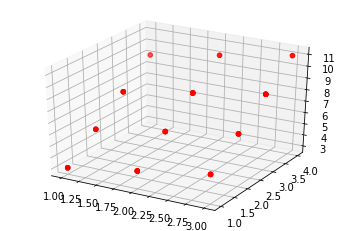

In [40]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
X = np.array([1, 1, 2, 3, 1, 2, 2, 3])
Y = np.array([1, 2, 2, 1, 3, 4, 3, 3])
Z2 = np.array([3, 5, 6, 5, 7, 10, 8, 9])
X, Y = np.meshgrid(X, Y)

Z1 = X + 2* Y
ax=plt.subplot(111,projection='3d') 
ax.scatter(X, Y, Z1, c="r")
plt.show()

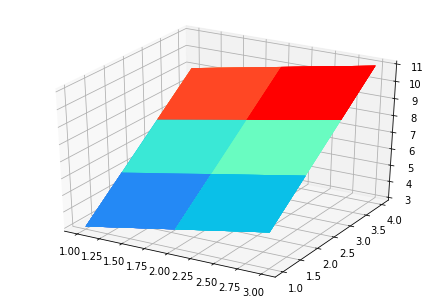

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

迭代次数：1500 theta： [11.37500565 11.19370369] error：931.249673


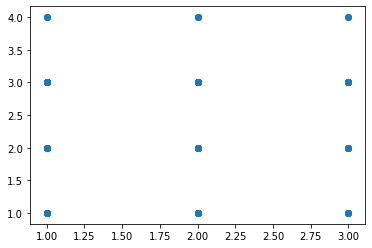

In [121]:
# 前t次的平方和进行计算 
# 以 y=x1+2*x2为例

import numpy as np
import random

# 多元数据
def Adagrad():
    # 训练集，每个样本有三个分量
    #x = np.array([(1, 1), (1, 2), (2, 2), (3, 1), (1, 3), (2, 4), (2, 3), (3,3)])
    x = np.array([[1,1],[1,2],[2,2],[3,1],[1,3],[2,4],[2,3],[3,3]])
    y = np.array([3, 5, 6, 5, 7, 10, 8, 9])
    alpha = 0.01  # 学习率
    threshold = 0.0001  # 停止迭代的错误阈值
    iterations = 1500  # 迭代次数
    error = 0  # 初始错误为0
    m, dim = x.shape
    gradient = np.random.randn(dim)  # 初始梯度为0
    theta = np.zeros(dim)
    epislon= 1e-7
    G_t = 0
    X,Y = list(),list()
    # 迭代开始
    for i in range(iterations):
        j = i % m
        error = 1 / (2 * m) * np.dot((y - np.dot(x, theta)).T,(y - np.dot(x, theta)))
        Y.append(error)
        # 迭代停止
        if abs(error) <= threshold:
            break

        gradient = 1 / m * x[j] * (np.dot(x[j], theta) - y[j])
        theta -= alpha/np.sqrt(G_t+1e-7)*gradient
        X.append(theta)
        #gradient = momentum * gradient + alpha * (1 / m * x[j] * (np.dot(x[j], theta) - y[j]))
        #theta -= gradient
        G_t += np.dot(gradient.T, gradient)

        #print(np.sum(G_t))
    print('迭代次数：%d' % (i + 1), 'theta：', theta, 'error：%f' % error)

plt.scatter(X,Y)
if __name__ == '__main__':
    Adagrad()

> * RMSprop:可以看做是Adadelta的一个特例  
当p = 0.5时，

$$ E[g^2]_t = \rho * E[g^2]_{t-1} + (1-\rho)*(g_t)^2$$

>上式再求根就变成RMS

$$ RMS[g]_t = \sqrt{E[g^2]_t + \epsilon} $$

> 特点：  
优点：RMSprop的效果介于AdagradHRAdadelta之间；适合处理非平稳目标，对于RNN的效果很好  
缺点：仍然依赖于全局的学习率

### 3 激活函数整理

* ReLu

In [6]:
def relu(x):
    if x > 0: 
        return x
    else:
        return 0
relu(5)

5

* sigmoid

In [26]:
import numpy as np
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [27]:
s = np.linspace(-5,5,100)

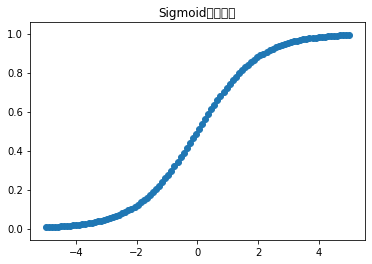

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Sigmoid激活函数")
plt.scatter(s, Sigmoid(s))

* tanh

$$tanh(x) =  \frac{2}{1+\exp^{-2*x}}-1$$

In [30]:
def tanh(x_):
    return 2/(np.exp(-2*x_)+1)-1

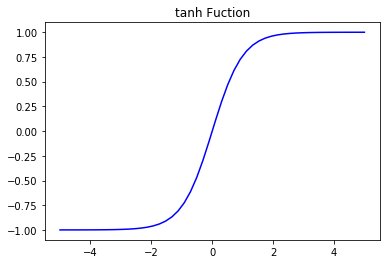

In [31]:
x_ = np.linspace(-5,5)
y_ = tanh(x_)
plt.plot(x_, y_, 'b-')
plt.title("tanh Fuction")
plt.show()